In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

last_date= dt.datetime.strptime(last_date,"%Y-%m-%d")

In [11]:
# Calculate the date 1 year ago from the last data point in the database
first_date = last_date - dt.timedelta(days = 365)

In [12]:
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > first_date).order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_date_df = pd.DataFrame(year_data,columns = ['date','precipitation'])
precip_date_df.set_index('date',inplace = True)

# Sort the dataframe by date
date_sort_df = precip_date_df.sort_values(by=['date']).dropna()

date_sort_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


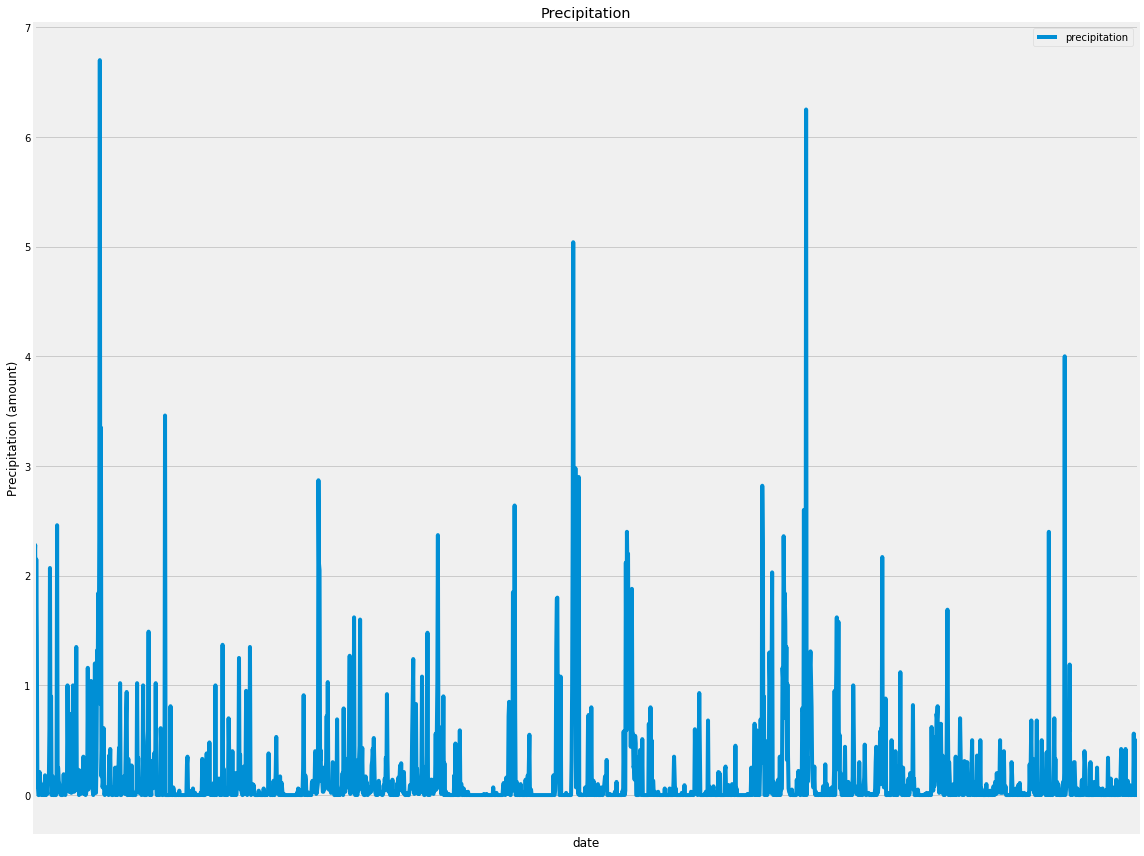

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
date_sort_df.plot(xticks=[],figsize=(16,12))
plt.title("Precipitation")
plt.ylabel("Precipitation (amount)")
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_sort_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(func.count(Station.id)).all()
stations_count

[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Which station has the highest number of observations?
Station USC00519281 has the highest number of observations.

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_details = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).all()
station_details

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
annual_tobs = session.query(Measurement.tobs,Measurement.date).filter(Measurement.date > first_date,Measurement.station == active_stations[0][0]).all()
tobs_df = pd.DataFrame(annual_tobs,columns = ['tobs','date'])
tobs_df.head()

,tobs,date
0,77.0,2016-08-24
1,80.0,2016-08-25
2,80.0,2016-08-26
3,75.0,2016-08-27
4,73.0,2016-08-28


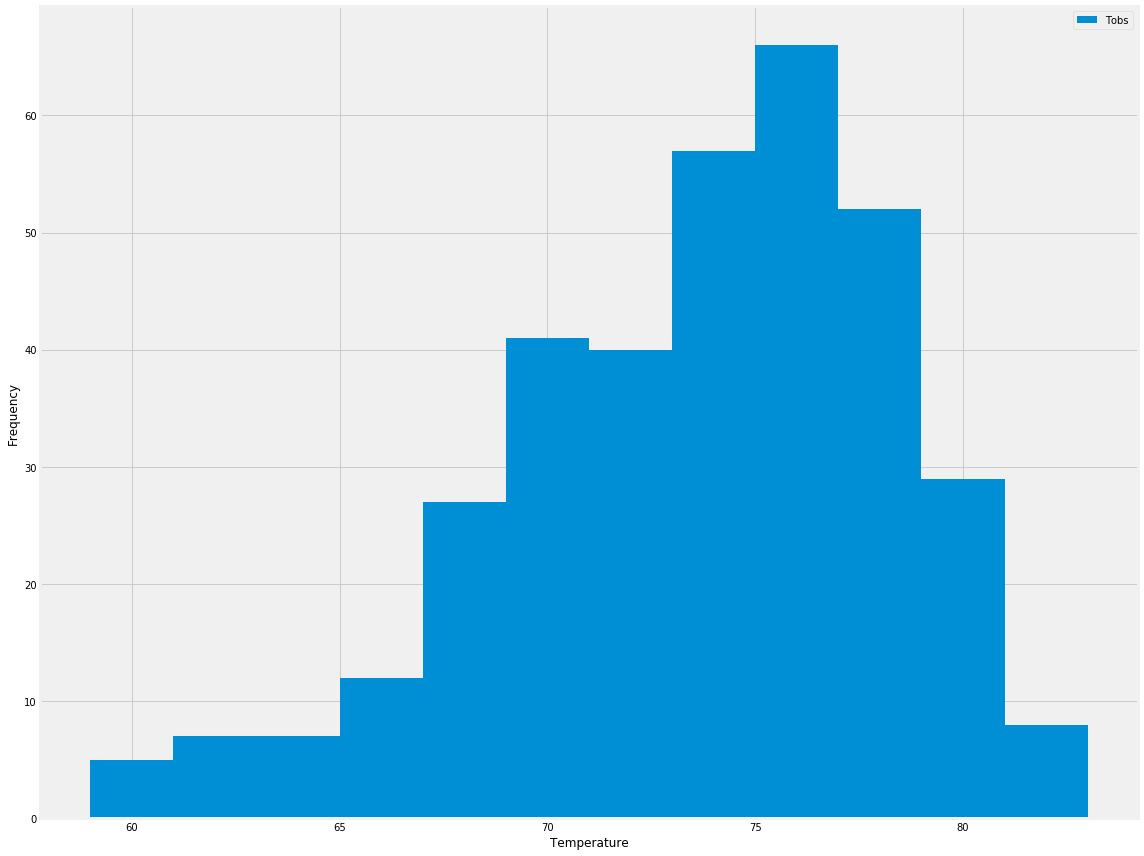

In [20]:
# plot the results as a histogram
plt.figure(figsize=(16,12))
plt.hist(tobs_df['tobs'],bins = 12)
plt.legend(['Tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()